In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(777)

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<class 'numpy.ndarray'>
<class 'module'>


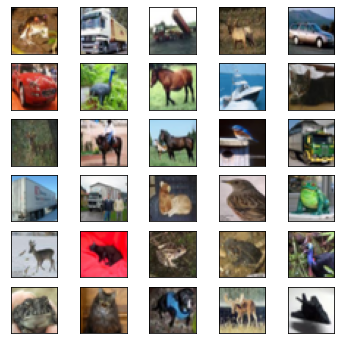

In [4]:
sample_size = 30
random_idx = np.random.randint(33500, size = sample_size)
plt.figure(figsize = (6, 6))


# # 클래스 이름 추출하기
print(type(x_train))
print(type(cifar10))
# # print(cifar10.labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


for i, idx in enumerate(random_idx):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
#     plt.xlabel(class_names[t_train[i]])
plt.show()

In [11]:
from tensorflow.keras.utils import to_categorical
x_train = np.reshape(x_train / 255, (-1, 32, 32, 1))
x_test = np.reshape(x_test / 255, (-1, 32, 32, 1))


t_train = to_categorical(t_train)
t_test = to_categorical(t_test)


from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size = 0.33, random_state = 777)

ValueError: Found input variables with inconsistent numbers of samples: [150000, 50000]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential([
    Conv2D(filters = 16, kernel_size = 3, padding = 'same',
          activation = 'relu', input_shape = (32, 32, 3)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

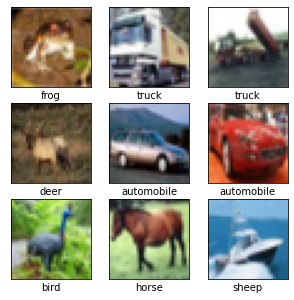

In [12]:
from tensorflow.keras.datasets import cifar10

(x_train,t_train), (x_test, t_test) = cifar10.load_data()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_size = 9
np.random.seed(777)
class_names=['airplane', 'automobile', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[int(t_train[i])])
    
plt.show()

In [13]:
x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                 test_size=0.3)



In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
#(32, 32, 3)의 데이터를 입력 받습니다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
# pool_size : 커널의 크기, kernel_size처럼 하나의 숫자로 사용할 수 있다.
# strides : 스트라이드 크기. 기본값 = None. 만약 값을 적어주지 않는다면, pool_size와 동일한 크기로 지정
# padding : 데이터의 크기를 동일하게 얻기위해서 사용하는 것
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [15]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 [==============================] - 78s 2ms/sample - loss: 1.6586 - acc: 0.3995 - val_loss: 1.4389 - val_acc: 0.4823
Epoch 2/30
35000/35000 [==============================] - 79s 2ms/sample - loss: 1.3123 - acc: 0.5313 - val_loss: 1.2432 - val_acc: 0.5589
Epoch 3/30
35000/35000 [==============================] - 78s 2ms/sample - loss: 1.1666 - acc: 0.5895 - val_loss: 1.2100 - val_acc: 0.5775
Epoch 4/30
35000/35000 [==============================] - 78s 2ms/sample - loss: 1.0492 - acc: 0.6334 - val_loss: 1.0734 - val_acc: 0.6217
Epoch 5/30
35000/35000 [==============================] - 78s 2ms/sample - loss: 0.9541 - acc: 0.6686 - val_loss: 1.0084 - val_acc: 0.6437
Epoch 6/30
35000/35000 [==============================] - 78s 2ms/sample - loss: 0.8768 - acc: 0.6977 - val_loss: 0.9478 - val_acc: 0.6670
Epoch 7/30
35000/35000 [==============================] - 78s 2ms/sample - loss: 0.8010 - acc: 0.7241 - val_loss: 0.

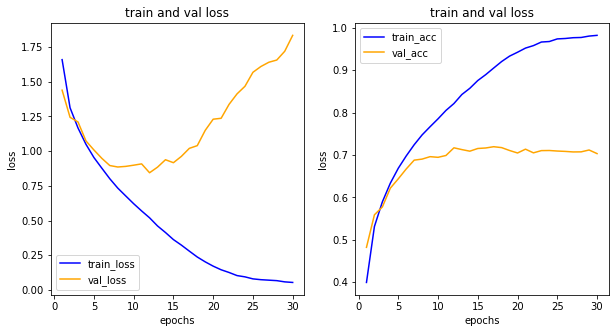

In [16]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()


C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


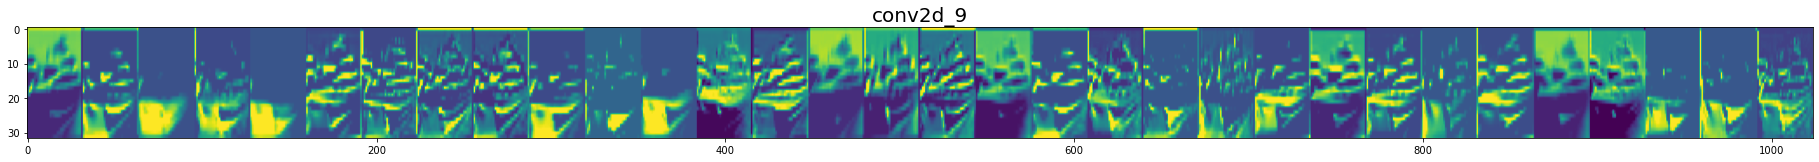

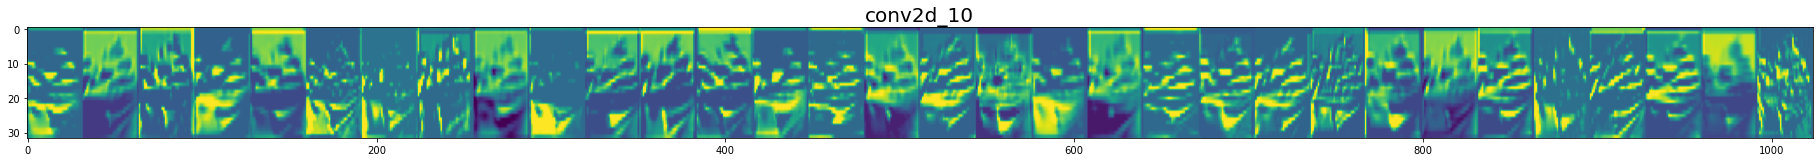

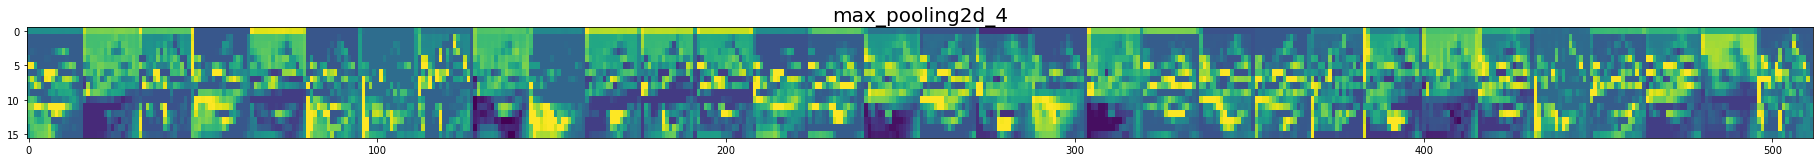

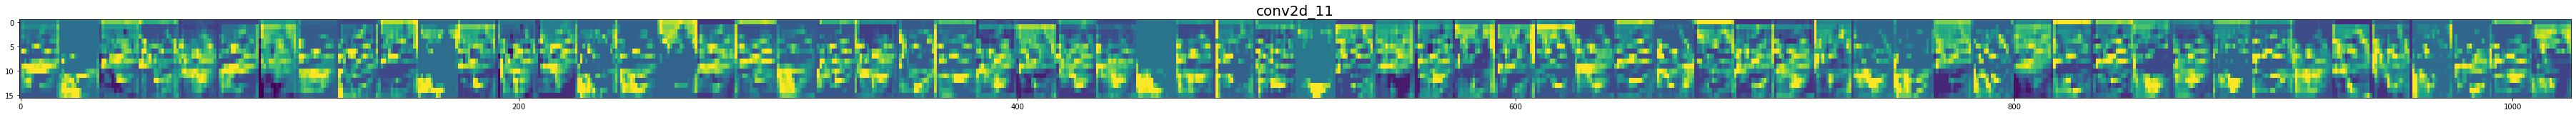

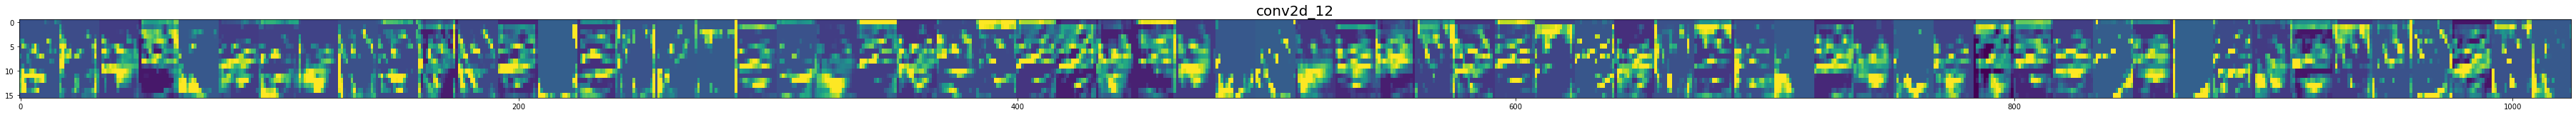

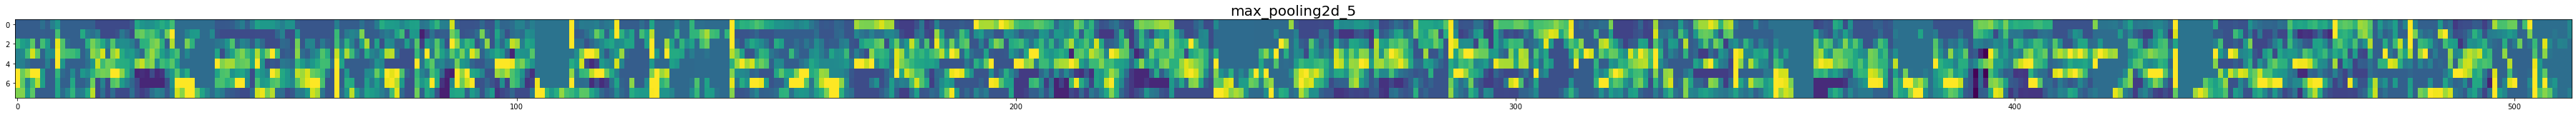

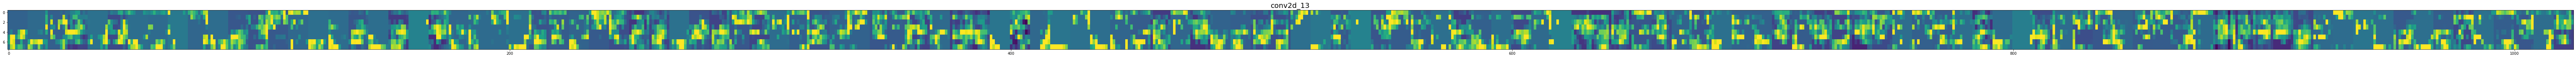

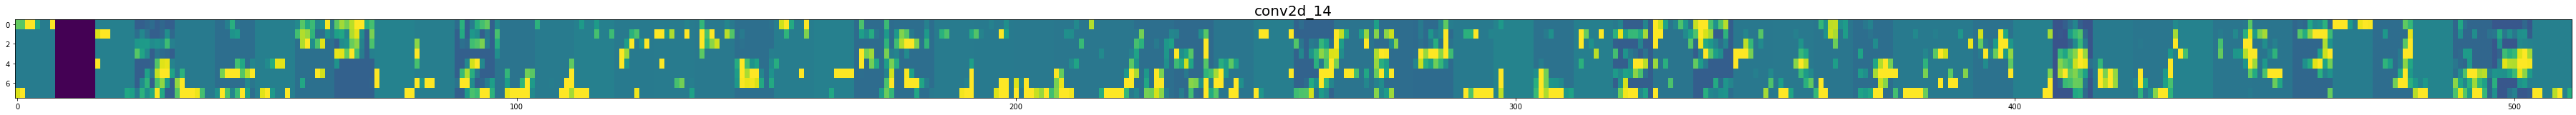

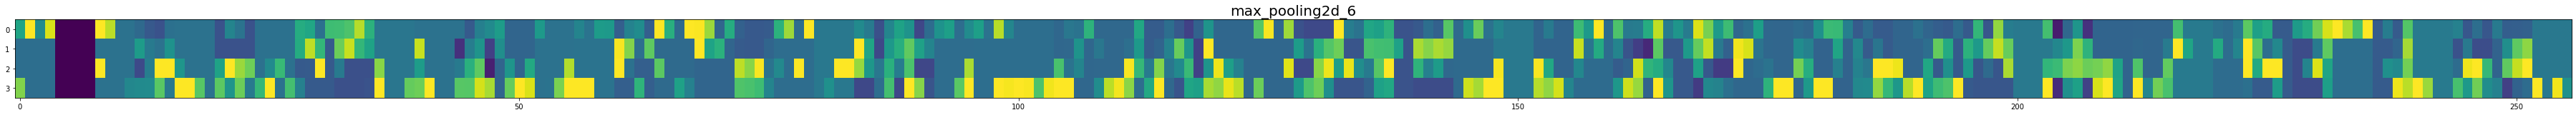

In [17]:
import tensorflow as tf
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져옵니다.
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output)

test_img = np.expand_dims(x_test[1], axis=0)
feature_maps= visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        display_grid = np.zeros((img_size, img_size * features))
        
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
        plt.figure(figsize=(features, 2 + 1./features))
        plt.title(layer_name, fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap='viridis')

In [25]:
# 과대적합이 될 가능성이 농후할 경우
# 예방책
# 규제화 함수
# 임의로 모델의 복잡도를 제한시키는 것
# L1노름(가중치의 절대값핪), L2 노름(가중치의 제곱합), 
# L1 + L2 = 엘라스틱넷(혼합(절대값합 + 제곱값))
# 가중치 감쇠
# 기능에 맞게 가중치의 합을 구하여 손실함수에 더하게 됩니다.
# L2의 가중치의 제곱합 + 손실함수

# 규제화 함수 사용한 모델
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu', kernel_regularizer=l2(0.001)))

# pool_size = 커널의 크기, kernel_size처럼 하나의 숫자로 사용할 수 있다.
# strides = 스트라이드 크기, 기본값 : None, 만약에 값을 적어주지 않는다면
# pool_size와 동일한 크기로 지정
# padding = 데이터의 크기를 동일하게 얻기위해서 사용되는 것
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
#(32, 32, 3)의 데이터를 입력 받습니다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer = l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regulairzer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'), kernel_reglarizer=l2(0.001))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

TypeError: add() got an unexpected keyword argument 'kernel_regularizer'

In [26]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

Train on 35000 samples, validate on 15000 samples
Epoch 1/30
 5792/35000 [===>..........................] - ETA: 1:06 - loss: 2.6263 - acc: 0.2528

KeyboardInterrupt: 

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()


In [ ]:
# 드롭아웃
# 과대적합을 피하기 위해서 사용되는 대표적인 방법 중 하나 입니다.
# 학습이 진행되는 동안 신경망의 일부 유닛을 제외합니다.
# 제외하지 않은 유닛을 집중적으로 학습하게 되면서
# 과대적합 문제를 방지하고 더 나은 성능을 기대할 수 있다.
# 보통 드롭아웃 비율을 0.2 ~ 0.5를 사용합니다.


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensroflow.keras.regularizer import l2



model = Sequential()
#(32, 32, 3)의 데이터를 입력 받습니다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Droupout(0.2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer=l2(0.001))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regulairzer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Droupout(0.2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Droupout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'), kernel_reglarizer=l2(0.001))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [ ]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()


In [ ]:
# 배치정규화
# 과대적합의 해결책은 아님.
# 내부 공신성을 확인하는 것
# 어밀하게 말하면, 신경망층의 출력값이 다향한 입력 데이터에 따라서 바꿀 수 있다.
# 매우 큰 범위의 출력값은 불안정하게 성능 저하를 일으킬 수 있다.
# 배치 정규화는 신경망층의 출력값이 가질 수 있는 범위 줄여줘서 불확실성을 감소시키는 방법
# Dense -> Conv2D -> BatchNormallization -> Activation -> MaxPool

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Fletten, Conv2D, Dropout, MaxPool2D, BatchNomarlization
from tensorflow.keras.optimizer import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', actiavtion = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', actiavtion = 'relu'))
model.add(BathNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(BachNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer = Adam(1e-4), loss = 'spares_categorical_crossentropy', metrics = ['acc'])

history = model.fit(x_train, t_train, epochs =30, batch_size = 32, validation_data = (x_val, t_tval))

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 학습 및 검증손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
zx1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()

In [ ]:
# 데이터 증식
# 기존의 데이터에 변형을 추가해서 새로운 데이터를 만들어내는 방법
# 딥러빙의 고질적인 문제? -> 일반화 문제의 대응점이라고 만들긴 했는데 대응을 못함

# 장점
# 1) 다양한 데이터를 입력시킴으로써 모델을 더욱 견고하게 만들어 테스트 시 더 높은 성능을 기대할 수 있게 한다.
# 2) 수집된 데이터가 적은 경우에 강력한 힘을 발휘한다. ??? 많고 적음의 기준?

# 이미지 제너레이터를 통해서 데이터 증식을 모델에 입력
# width_shift_range : 임의의 크기만큼 너비 방향으로 이동시킵니다.
# 입력 데이터가 0.2이고 이미지의 너비가 100이라면 -23 ~ +20 범위에서 너비 방향으로 이동

# height_shift_range : 임의의 크기만큼 높이방향으로 이동시킵니다.
# 0.2이고, 이미지의 높이가 100이라면 -20 ~ +20 범위에서 높이 방향으로 이동

# brightness_range : 이미지의 밝기 정도를 조정합니다.
# (0.5, 1.5)이면 원본 대비 50%의 비율로 어둡거나 밝게 조절합니다.

# shear_range : 시계 반대 방향으로 밀림 강도를 조절합니다.
# 0.5이면 0.5 ~ 1.5배의 범위에서 이미지의 크기를 조절합니다.

# rotation_range : 이미지를 임의로 회전시킵니다.
# 180이라면, 0 ~ 180 범위에서 임의로 이미지를 회전시킵니다.

# rescale : 이미지 픽셀값의 크기를 조절합니다.
# 1/255라면 각 픽셀 값에 해당 값이 곱해집니다.

# fill_mode : 이미지 변환시 새로 생기는 픽셀을 채울 방법을 결정합니다.
# ['nearest', 'constant', 'reflect or wrap']

# horizontal_flip : True일 경우 임의로 이미지를 수평 방향으로 뒤집습니다.

# vertical_flip : True일 경우 임의로 이미지를 수직 방향으로 뒤집습니다.

# prepprocessing_function : 사용자 정의 전처리 함수 또는 전처리 함수를 적용합니다.

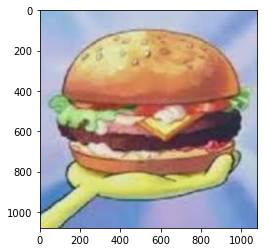

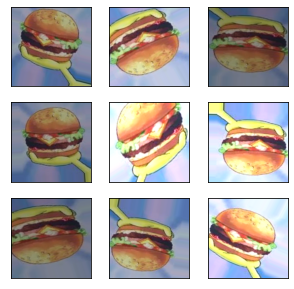

In [40]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  vertical_flip = True,
                                  shear_range = 0.5,
                                  brightness_range = [0.5, 1.5],
                                  zoom_range = 0.2,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1,
                                  rotation_range = 30,
                                  fill_mode = 'nearest')

hamburger = img_to_array(load_img('./data/hamburger.png')).astype(np.uint8)
plt.figure()
plt.imshow(hamburger)

hamburger = hamburger.reshape((1,) + hamburger.shape)
train_generator = train_datagen.flow(hamburger, batch_size = 1)

plt.figure(figsize=(5,5))
for i in range(9):
    data = next(train_generator)
    image = data[0]
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')
    
plt.show()

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
class_names=['airplane', 'automobile', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

import matplotlib.pyplot as plt
import numpy as np

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)


x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                 test_size=0.3)

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                  zoom_range = 0.2,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  rotation_range=30,
                                  fill_mode = 'nearest')

val_datagen = ImageDataGenenrator()

batch_size = 32

train_generator = train_datagen.flow(x_train,t_train,
                                    batch_size = batch_size)

val_generator = val_datagen.flow(x_Val, t_val,
                                batch_size = batch_size)